In [2]:
#We are importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
# Step 2: Load dataset safely
df = pd.read_csv(
    "/content/IMDB Dataset.csv",
    names=["review", "sentiment"],   # manually set column names
    header=0,                        # ignore the original header row
    on_bad_lines="skip",             # skip badly formatted lines
    engine="python"                  # more flexible parser
)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Quality checks
print(df['sentiment'].value_counts())  # positive vs negative counts
print(df.isnull().sum())               # check for missing entries


sentiment
positive    25000
negative    25000
Name: count, dtype: int64
review       0
sentiment    0
dtype: int64


In [5]:
# Step 3: Preprocessing of data

# Convert text labels to binary (positive → 1, negative → 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Separate features and labels
X = df['review']         # text reviews
y = df['sentiment']      # binary labels

# TF-IDF vectorization: Convert text into numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (50000, 5000)


In [6]:
# Step 4: Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,         # 20% for testing
    random_state=42,       # ensures reproducibility
    stratify=y             # ensures class balance in train/test
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 40000
Testing set size: 10000


In [7]:
# Step 5: Define ML models (using faster LinearSVC)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC  # ✅ Use LinearSVC instead of SVC

# Dictionary of models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Linear SVM": LinearSVC(random_state=42)  # ✅ Faster version of SVM
}





📘 Training Random Forest...


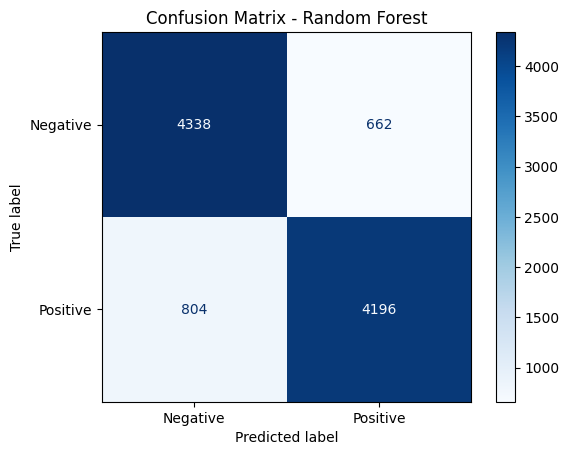


📘 Training Logistic Regression...


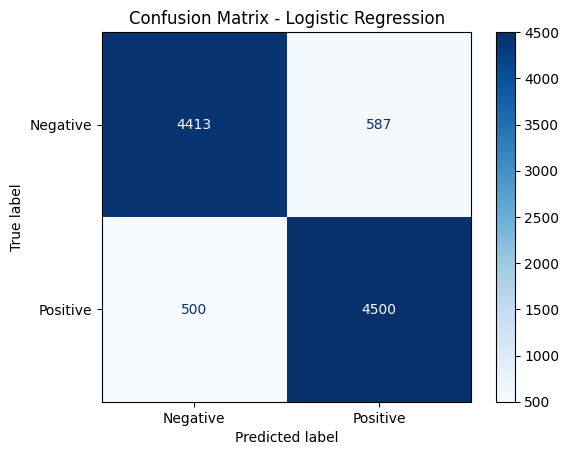


📘 Training Linear SVM...


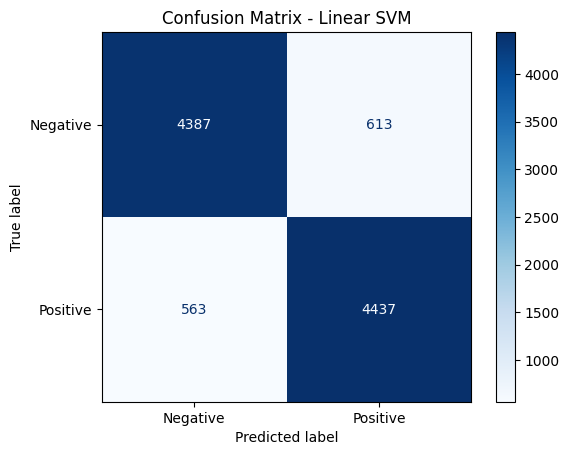

In [8]:
# Step 6: Train and evaluate each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Store results
results = []

for name, model in models.items():
    print(f"\n📘 Training {name}...")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results
    results.append([name, acc, prec, rec, f1])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

# Save results into a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])


/tmp/ipython-input-3782461747.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


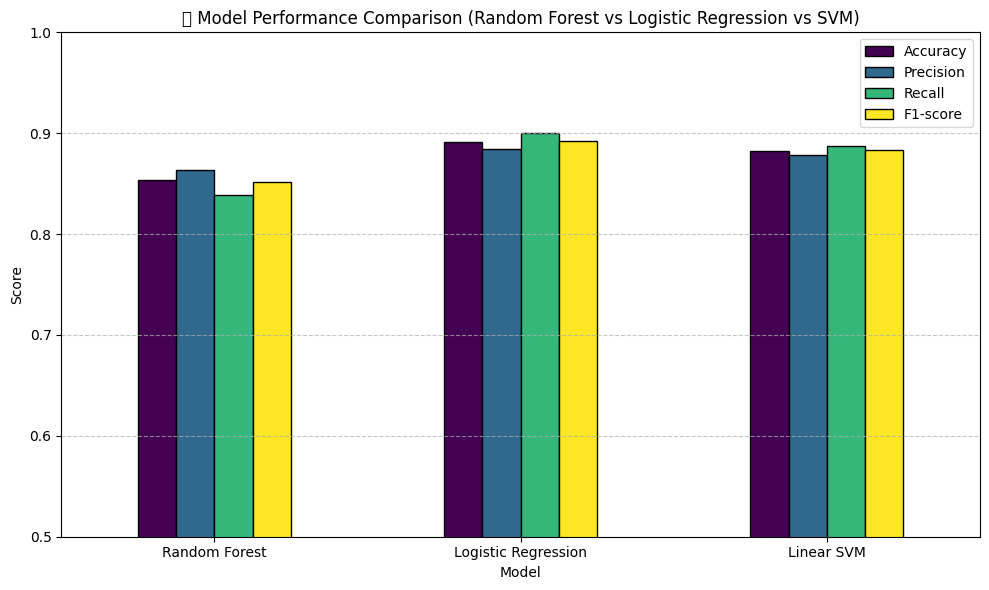

🔍 Model Evaluation Table:



,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.8534,0.863730,0.8392,0.851288
1,Logistic Regression,0.8913,0.884608,0.9000,0.892238
2,Linear SVM,0.8824,0.878614,0.8874,0.882985


In [9]:
# Step 7: Visualize model performance comparison
import matplotlib.pyplot as plt

# Plot performance of all trained models (Random Forest, Logistic Regression, SVM)
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar",
    figsize=(10, 6),
    colormap='viridis',
    edgecolor='black'
)

plt.title("📊 Model Performance Comparison (Random Forest vs Logistic Regression vs SVM)")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Also display the table
print("🔍 Model Evaluation Table:\n")
display(results_df)
